Individual Report for Data Science Project (Yichen Li)

(1)	Data Description: 
Observations: 
Each row in the dataset represents an individual player. The total number of observations should correspond to the number of unique players.

Variables for players dataset: 
a. experience: Indicates the player's level of experience, with categories "Pro", "Veteran", "Amateur", "Regular" and "Beginner" 
b. subscribe: Indicates if the player is subscribed 
c. hashedEmail: A hashed version of the player's email address used to identify specific player without exposing personal information 
d. played_hours: The total number of hours the player has spent in the game during the study
e. name: The player's name in the game 
f. gender: The player's gender 
g. age: The player's age

Variable for sessions dataset: 
a. hashedEmail: A hashed version of the player's email address used to identify specific player without exposing personal information 
b. start_time: The day the player started playing the game 
c. end_time: The day the player ended playing the game

Potential issues: 
For variable "experience": It might have balances between categories which might affect the prediction or model performance. 
For variable "subscribe": It is important to clarify the meaning of subscribe in the context of the data. 
For variable "hashedEmail": There might be potential duplicates if different emails are linked to the same player since the number of players may be extremely big. 
For variable "played_hours": There might be outliers, or players with 0 hours who haven't started yet after registration. 
For variable "name": There also might be potential duplicates. 
For variable "gender" and "age": They may not valuable as reference because they could be unrealistic.

(2) Chosen Question: 
We would like know which type of experience a given-age player belongs to and how much data (played_hours) he is going to contribute so that we can target those players in our recruiting efforts.

(3) Exploratory Data Analysis and Visualization: 
According the players dataset and the question I chose, the decided corresponding variables to our project are 'experience', 'played_hours' and 'age'. In our visualization, the explanatory variable is 'age', the response variable is 'played_hours', and the variable we are going to classify is 'experience'.
When it comes to wrangling the dataset, the first thing we need to do is to select the columns we need like 'experience', 'played_hours', and 'age' in the player dataset. The second thing is to get rid of the outliers that may occur during our visualization. We can simply filter the 'played_hours' column and delete the players with 0 played hours during the study.
In later phase of the project, I am going to provide both regression model and knn classification model on the scratterplot using different color lines and dots to achieve the high-quality visualization.

(4) Methods and Plan:
In this project, I am planning to do two kinds of prediction methods which are regular regression and regular knn classification. In both prediction methods, we can split the dataset into training data and testing data and use cross-validation in order to get the most accurate regression model and the k value for the classification (in later phase).
In our visualization scatterplot, we can easily see that there appears no linear relationship between the two chosen variable so I decided to use the regression model instead of the linear one.
After using the regression model, we can know the estimate played_hours of the given-age player. Knowing the two variable, we can use the knn classification to identify which experience type he belongs to and analyze how much data he is going to contribute to the study.
However, the potential limit is that the provided information of the players may not be true which causes the model not fitting well in the real world.






── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): p

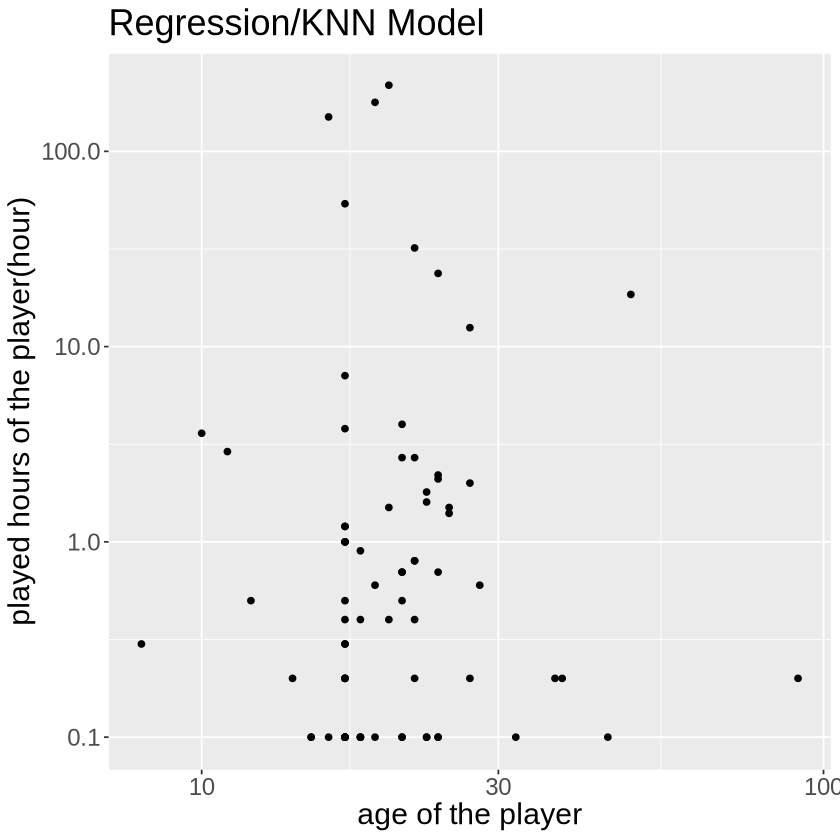

In [4]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
players <- read_csv("players.csv")
players
sessions <- read_csv("sessions.csv")
players_ready <- players |> select(experience, played_hours, age) |> arrange(played_hours) |> filter(played_hours != 0)
players_split <- initial_split(players_ready, prop = 0.7, strata = played_hours)
players_training <- training(players_split)
players_testing <- testing(players_split)
players_plot <- players_training |> 
    ggplot(aes(x = age, y = played_hours)) + 
    geom_point() + labs(x = 'age of the player', y = 'played hours of the player(hour)') + 
    ggtitle('Regression/KNN Model') +
    theme(text = element_text(size = 18)) +
    scale_x_log10(labels = label_comma()) +
    scale_y_log10(labels = label_comma())
players_plot